# Energy Indicators

The file `Energy Indicators.xls` is a list of indicators of energy supply and renewable electricity production from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013.

`world_bank.csv` is a file with countries' GDP data from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD).

`scimagojr-3.xlsx` is a file from [Sciamgo Journal and Country Rank data for Energy, Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) which has data ranking countries based on their journal conbtibutions in the aforementioned area.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
plt.style.use('ggplot')

### Loading Energy Indicators file

In [2]:
energy = pd.read_excel('data/Energy Indicators.xls', index_col = 0, skiprows = 16)

energy.head()

,Unnamed: 1,Unnamed: 2,Energy Supply,Energy Supply per capita,Renewable Electricity Production
NaN,NaN,NaN,Petajoules,Gigajoules,%
NaN,Afghanistan,Afghanistan,321,10,78.6693
NaN,Albania,Albania,102,35,100
NaN,Algeria,Algeria,1959,51,0.55101
NaN,American Samoa,American Samoa,...,...,0.641026


In [3]:
energy.tail(40)

,Unnamed: 1,Unnamed: 2,Energy Supply,Energy Supply per capita,Renewable Electricity Production
NaN,Zambia,Zambia,400,26,99.7147
NaN,Zimbabwe,Zimbabwe,480,32,52.5361
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,Sources:,NaN,NaN,NaN,NaN
NaN,UNSD Energy Statistics Yearbook.,NaN,NaN,NaN,NaN
NaN,See: http://unstats.un.org/unsd/energy/yearboo...,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,Footnotes:,NaN,NaN,NaN,NaN
NaN,1,Excludes the overseas territories.,NaN,NaN,NaN


In [4]:
# to create a default numbered index
energy = energy.reset_index()

# drop the footer
energy = energy.iloc[:-38] # Last 38 lines are footer

# First column is just NaN and there are two columns of country names.
# so let's remove first "NaN" column and the second duplicate country name column
energy = energy.iloc[:, 2:]

# renaming columns
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# There is one row below teh column names that is unnecessary
energy = energy.iloc[1:]

energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
1,Afghanistan,321,10,78.6693
2,Albania,102,35,100
3,Algeria,1959,51,0.55101
4,American Samoa,...,...,0.641026
5,Andorra,9,121,88.6957


In [5]:
energy.tail()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
223,Viet Nam,2554,28,45.3215
224,Wallis and Futuna Islands,0,26,0
225,Yemen,344,13,0
226,Zambia,400,26,99.7147
227,Zimbabwe,480,32,52.5361


In [6]:
# replace '...' with NaN (fill the blank cells with NaN)
energy = energy.replace('...', np.NaN)

energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
1,Afghanistan,321.0,10.0,78.669280
2,Albania,102.0,35.0,100.000000
3,Algeria,1959.0,51.0,0.551010
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9.0,121.0,88.695650


In [7]:
# 'Energy Supply' in petajoules and 'Energy Supply per Capita' is in gigajoules. 
# To make it uniform we need to change petajoules in gigajoules
# There are 1,000,000 gigajoules in a petajoule
energy['Energy Supply'] = energy['Energy Supply']*1000000
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
1,Afghanistan,3.210000e+08,10.0,78.669280
2,Albania,1.020000e+08,35.0,100.000000
3,Algeria,1.959000e+09,51.0,0.551010
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9.000000e+06,121.0,88.695650


In [8]:
# Change the name of some countries to make it uniform across all files.
dicts1 = {'Republic of Korea': 'South Korea',
         'United States of America': 'United States',
         'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
         'China, Hong Kong Special Administrative Region': 'Hong Kong'}

# First we need to remove integers from some country names
energy['Country'] = energy['Country'].str.replace('\d+', '')

# Now remove parentheses and everything inside them from country names
energy['Country'] = energy['Country'].str.replace(r'\(.*\)', '')

# There is a whitespace following country names in some of the countries, such as Iran.
# Let's remove that
energy['Country'] = energy['Country'].str.strip()

# Finally replace country names from dicts1
energy['Country'] = energy['Country'].replace(dicts1)

energy['Country']

1                    Afghanistan
2                        Albania
3                        Algeria
4                 American Samoa
5                        Andorra
                 ...            
223                     Viet Nam
224    Wallis and Futuna Islands
225                        Yemen
226                       Zambia
227                     Zimbabwe
Name: Country, Length: 227, dtype: object

In [9]:
# Now let's get the column names as a list
column_list_energy = energy.columns.values.tolist()
column_list_energy

['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

### Loading GDP file

In [10]:
gdp = pd.read_csv('data/world_bank.csv', index_col = 0, skiprows = 4)
gdp.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [11]:
gdp.tail()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
"Yemen, Rep.",YEM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.672565e+10,2.761787e+10,2.872656e+10,2.991436e+10,3.090675e+10,2.624342e+10,2.689160e+10,2.800914e+10,NaN,NaN
South Africa,ZAF,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,7.707081e+10,8.003449e+10,8.497844e+10,9.124438e+10,9.848904e+10,1.072507e+11,1.120109e+11,...,3.402852e+11,3.585261e+11,3.699668e+11,3.642764e+11,3.753494e+11,3.874074e+11,3.960071e+11,4.047682e+11,4.110369e+11,4.163117e+11
"Congo, Dem. Rep.",COD,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.508024e+10,1.344383e+10,1.629401e+10,1.714358e+10,1.672524e+10,1.689205e+10,1.803656e+10,...,1.650894e+10,1.754232e+10,1.863448e+10,1.916651e+10,2.052329e+10,2.193213e+10,2.350200e+10,2.550050e+10,2.778776e+10,2.970961e+10
Zambia,ZMB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4.592975e+09,4.655503e+09,4.539542e+09,4.688093e+09,5.260699e+09,6.136472e+09,5.794651e+09,...,1.440569e+10,1.560892e+10,1.682234e+10,1.837342e+10,2.026555e+10,2.140358e+10,2.302438e+10,2.420595e+10,2.542227e+10,2.624127e+10
Zimbabwe,ZWE,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,3.338344e+09,3.549199e+09,3.600111e+09,3.824915e+09,3.782605e+09,3.968352e+09,4.028795e+09,...,1.006276e+10,9.695130e+09,7.982103e+09,8.459783e+09,9.422161e+09,1.054391e+10,1.165789e+10,1.218064e+10,1.264939e+10,1.278517e+10


In [12]:
gdp = gdp.reset_index()
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [13]:
# rename 'Country Name' to 'Country'
gdp = gdp.rename(columns = ({'Country Name' : 'Country'}))
gdp.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [14]:
# As with energy dataframe we need to change names of some countries
dicts2 = {'Korea, Rep.' : 'South Korea',
         'Iran, Islamic Rep.' : 'Iran',
         'Hong Kong SAR, China' : 'Hong Kong'}

gdp['Country'] = gdp['Country'].replace(dicts2)

# we need data from only last 10 years
column_list_gdp = gdp.columns.values.tolist()

columns_of_interest_gdp = ['Country', '2006', '2007', '2008', '2009', '2010',
                          '2011', '2012', '2013', '2014', '2015']

# remove unwanted columns
gdp = gdp[columns_of_interest_gdp]

gdp.head()

,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


### Loading ScimEn file

In [15]:
scimen = pd.read_excel('data/scimagojr-3.xlsx')
scimen.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


In [16]:
# Let's get column names as a list
column_list_scimen = scimen.columns.values.tolist()

# Rank and Country are first and second columns respectively, let's swap their positions
columns_of_interest_scimen = ['Country', 'Rank', 'Documents', 'Citable documents',
                             'Citations', 'Self-citations', 'Citations per document', 'H index']

scimen = scimen[columns_of_interest_scimen]
scimen.head()

,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,China,1,127050,126767,597237,411683,4.70,138
1,United States,2,96661,94747,792274,265436,8.20,230
2,Japan,3,30504,30287,223024,61554,7.31,134
3,United Kingdom,4,20944,20357,206091,37874,9.84,139
4,Russian Federation,5,18534,18301,34266,12422,1.85,57


### Merging the three dataframes
Before merging the dataframes we need to set index to country for all three dataframes

In [17]:
energy = energy.set_index('Country')
gdp = gdp.set_index('Country')
scimen = scimen.set_index('Country')

In [18]:
intersection_merge = pd.merge(pd.merge(scimen, energy, how='inner', left_index=True, right_index=True),
                             gdp, how='inner', left_index=True, right_index=True)

intersection_merge.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


In [19]:
intersection_merge.tail()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Maldives,183,1,1,1,0,1.0,1,15000000.0,43.0,0.00000,1.862196e+09,2.063143e+09,2.320557e+09,2.192661e+09,2.323402e+09,2.525755e+09,2.588810e+09,2.710479e+09,2.886134e+09,2.929826e+09
Belize,185,1,1,6,0,6.0,1,13000000.0,39.0,64.69003,1.285312e+09,1.299522e+09,1.341485e+09,1.352206e+09,1.397113e+09,1.426484e+09,1.479846e+09,1.499280e+09,1.560479e+09,1.590417e+09
Palau,186,1,1,0,0,0.0,0,3000000.0,152.0,18.75000,2.074094e+08,2.072990e+08,1.957150e+08,1.779528e+08,1.838000e+08,1.930672e+08,1.992454e+08,1.943911e+08,2.026654e+08,2.216412e+08
Guyana,187,1,1,0,0,0.0,0,34000000.0,45.0,0.00000,1.919759e+09,2.054533e+09,2.095143e+09,2.164673e+09,2.259288e+09,2.382129e+09,2.496863e+09,2.627240e+09,2.728150e+09,2.810153e+09
Mauritania,191,1,1,1,0,1.0,1,51000000.0,13.0,0.00000,4.025616e+09,4.139051e+09,4.183751e+09,4.140153e+09,4.337792e+09,4.541844e+09,4.805048e+09,5.097687e+09,5.312107e+09,NaN


In [20]:
# although it seems in order based on rank, let's make sure
# by sorting the dataframe by rank
intersection_merge_final = intersection_merge.sort_values(by = 'Rank')
intersection_merge_final.head(15)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [21]:
intersection_merge_final.tail(15)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Nauru,171,2,2,0,0,0.0,0,1000000.0,60.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seychelles,172,2,2,7,2,3.5,1,9000000.0,94.0,1.977401,8.566842e+08,9.459630e+08,9.256542e+08,9.154234e+08,9.699365e+08,1.046438e+09,1.115610e+09,1.183103e+09,1.222346e+09,1.265101e+09
Mali,173,2,2,0,0,0.0,0,66000000.0,4.0,64.768210,7.265078e+09,7.868285e+09,8.619380e+09,9.631855e+09,1.067875e+10,1.150634e+10,1.279685e+10,1.369448e+10,1.476111e+10,1.588458e+10
Bermuda,174,2,2,12,0,6.0,1,6000000.0,88.0,0.000000,5.932559e+09,6.101393e+09,6.194616e+09,5.867282e+09,5.744414e+09,5.552580e+09,5.284138e+09,5.151445e+09,NaN,NaN
Chad,175,2,2,0,0,0.0,0,77000000.0,6.0,0.000000,8.462426e+09,8.739274e+09,9.006057e+09,9.385905e+09,1.065771e+10,1.066654e+10,1.161400e+10,1.227600e+10,1.312304e+10,1.335926e+10
Burundi,176,2,2,23,0,11.5,1,58000000.0,6.0,86.792450,1.714698e+09,1.796761e+09,1.887463e+09,1.952928e+09,2.026864e+09,2.111823e+09,2.196705e+09,2.297623e+09,2.404713e+09,2.343733e+09
Liberia,177,1,1,1,0,1.0,1,83000000.0,19.0,0.000000,9.858721e+08,1.079874e+09,1.157052e+09,1.218377e+09,1.292697e+09,1.398698e+09,1.510516e+09,1.641990e+09,1.653503e+09,1.658424e+09
Togo,178,1,1,0,0,0.0,0,134000000.0,19.0,80.180180,2.818834e+09,2.883398e+09,2.947568e+09,3.051036e+09,3.172946e+09,3.327905e+09,3.488321e+09,3.626731e+09,3.842067e+09,4.052431e+09
American Samoa,180,1,1,0,0,0.0,0,NaN,NaN,0.641026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding how many entries were lost by merging

In [22]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [23]:
def entries_lost(df1, df2, df3, intersection):
    union_merge = pd.merge(pd.merge(df1, df2, how='outer', left_index=True, right_index=True),
                          df3, how='outer', left_index=True, right_index=True)
    
    # now find out how many total entries are there
    total_entries = union_merge.shape[0]
    
    # now find out how many common entries are there
    common_entries = intersection.shape[0]
    
    return (total_entries - common_entries)

In [24]:
entries_lost(scimen, energy, gdp, intersection_merge_final)

156

### Reducing the dataframe to top 15 entries only

For simplicity let's take only top 15 entries from the merged dataframe

In [25]:
intersection_merge_final = intersection_merge_final.iloc[:15, :]
intersection_merge_final

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


__Calculating the average GDP over the last 10 years for each country__

In [26]:
# first 10 columns do not contain GDP data
df = intersection_merge_final.iloc[:,10:]
df

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,
China,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [27]:
# Calculate mean
df['avg'] = df.mean(axis=1)
df

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,avg
Country,,,,,,,,,,,
China,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12
United States,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13
Japan,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,5.542208e+12
United Kingdom,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,2.487907e+12
Russian Federation,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,1.565459e+12
Canada,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,1.660647e+12
Germany,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,3.493025e+12
India,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,1.769297e+12
France,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,2.681725e+12


In [28]:
avg_gdp = df.iloc[:,-1]
avg_gdp

Country
China                 6.348609e+12
United States         1.536434e+13
Japan                 5.542208e+12
United Kingdom        2.487907e+12
Russian Federation    1.565459e+12
Canada                1.660647e+12
Germany               3.493025e+12
India                 1.769297e+12
France                2.681725e+12
South Korea           1.106715e+12
Italy                 2.120175e+12
Spain                 1.418078e+12
Iran                  4.441558e+11
Australia             1.164043e+12
Brazil                2.189794e+12
Name: avg, dtype: float64

In [29]:
# sorting in descending order
avg_gdp = avg_gdp.sort_values(ascending=False)
avg_gdp

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avg, dtype: float64

In [30]:
avg_gdp.index[5]

'United Kingdom'

In [31]:
avg_gdp[5]

2487906661418.4175

__Calculating GDP change over the 10 year span for the country with given rank in average GDP__

In [32]:
def gdp_change_10yr(df,  rank):
    # remember numbering starts at 0, so rank 6th will be index 5
    rank = rank - 1
    
    # sorting the dataframe in descending order by average GDP
    df = df.sort_values(by='avg', ascending=False)
    
    # now find the change in gdp over 10 yr span
    df['gdp_change'] = df['2015'] - df['2006']
    
    return df.iloc[rank, -1]

In [33]:
gdp_change_10yr(df, 6)

246702696075.3999

__What is the mean `Energy Supply per Capita`?__

This is simply mean of column 'Energy Supply per Capita'

In [34]:
energy_supply_per_capita_mean = intersection_merge_final['Energy Supply per Capita'].mean()
energy_supply_per_capita_mean

157.6

__Which country has the maximum % Renewable and what is the percentage?__

In [35]:
my_tuple = (intersection_merge_final['% Renewable'].idxmax(), intersection_merge_final['% Renewable'].max())
my_tuple

('Brazil', 69.64803)

__Which country has the highest ratio of Self-Citations to Total Citations?__

In [36]:
df2 = intersection_merge_final.copy()
df2['citation ratio'] = df2['Self-citations'] / df2['Citations']

highest_self_citations_ratio = (df2['citation ratio'].idxmax(), df2['citation ratio'].max())
highest_self_citations_ratio

('China', 0.6893126179389422)

__Calculating estimates for population using Energy Supply and Energy Supply per capita based on the given rank in populous countries.__

In [37]:
def pop_energy(df, pop_rank):
    # remember numbering starts at 0, so rank 6th will be index 5
    pop_rank = pop_rank - 1
    
    # estimate population based on Energy supply and energy supply per capita
    df['pop_est'] = df['Energy Supply'] / df['Energy Supply per Capita']
    
    # sort the dataframe based on population estimate
    df = df.sort_values(by='pop_est', ascending=False)
    
    return df.index[pop_rank]

In [38]:
pop_energy(df2, 3)

'United States'

__What is the correlation between the number of citable documents per capita and the energy supply per capita?__

In [39]:
def citable_doc_energy_supply_corr(df):
    # estimate population based on Energy supply and energy supply per capita
    df['pop_energy_est'] = df['Energy Supply'] / df['Energy Supply per Capita']
    
    # now get the ratio
    df['Citable docs per Capita'] = df['Citable documents'] / df['pop_energy_est']
    
    # now calculate correlation
    correlation = df['Energy Supply per Capita'].corr(df['Citable docs per Capita'])
    
    df.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter',
            xlim=[0,0.0006])
    
    return correlation

0.7940010435442947

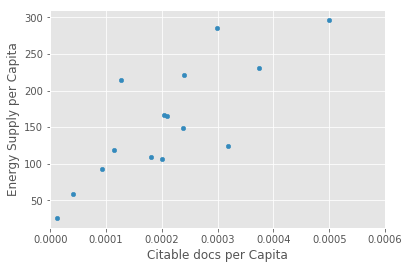

In [40]:
citable_doc_energy_supply_corr(df2)

__Finding if a country's % Renewable values is at or above the median for all countries in the top 15 or not.__

In [42]:
my_median = df2['% Renewable'].median()
df2['HighRenew'] = (df2['% Renewable'] >= my_median).astype('int')
df2['HighRenew']

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

__Grouping the countries by continent.__

In [43]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

df2['pop_energy_est'] = (df2['Energy Supply']/df2['Energy Supply per Capita']).astype('float')

# now convert the pop_est column to numeric
pd.to_numeric(df2['pop_energy_est'])

# now map the countries to the continents
df2['Continent'] = df.index.map(lambda x: ContinentDict[x])


# now group by continents
dfx = df2.groupby('Continent')['pop_energy_est'].agg(['size', 'sum','mean', 'std'])

dfx

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


__Binning the % Renewable into 5 bins.__

Cut % Renewable into 5 bins Group the top 15 by the continent, as well as these new % renewables bins. How many countries are in each of these groups?

In [44]:
def renewable_bins(df, dictionary):
    # map the countries to the continents
    df['Continent'] = df.index.map(lambda x: dictionary[x])
    
    # we only need % Renewable and Continent columns so drop unwanted columns
    necessary_index = ['% Renewable', 'Continent']
    df = df[necessary_index]
    
    # cut it into 5 bins
    df['bins'] = pd.cut(df['% Renewable'], 5)
    
    # now we need to group by continent and bins
    df = df.groupby(['Continent', 'bins']).size()
    
    return df

In [45]:
renewable_bins(df2, ContinentDict)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Continent      bins            
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

__Convert the population estimate series to a string with thousand separator (using commas).__

In [46]:
def thousand_separator(df):
    df['pop_energy_est'] = (df['Energy Supply']/df['Energy Supply per Capita']).astype('float')
    
    # keep only the column needed
    df = df['pop_energy_est']
    
    # now format the population with commas
    df = df.map(lambda x: "{:,}".format(x))
    
    return df

In [47]:
thousand_separator(df2)

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: pop_energy_est, dtype: object

### Plotting the data

In [48]:
def plot_rank_renewable(df):
    ax = df.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*df['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(df.index):
        ax.annotate(txt, [df['Rank'][i], df['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


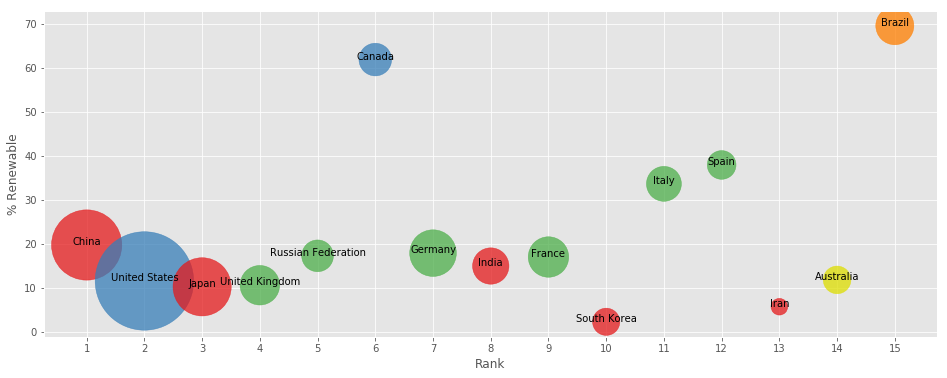

In [49]:
plot_rank_renewable(df2)